# Phase 1 Code Challenge Review 

_September 23, 2020_ 

TOPICS TO BE COVERED:
- Pandas Operations
- Data Visualization
- Statistics
- Python Data Structure

#### 1. Pandas Operations

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [13]:
# import data from a file 
df = sns.load_dataset('iris')

# what if this file is in a directory?

df2 = pd.read_csv('auto-mpg.csv')

In [14]:
# examine the first few elements of it
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# examine the dimensions of it
df.shape

(150, 5)

In [16]:
# check to see if you have missing values
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [107]:
#or you can get a count of how many null values are present in each columns
df.isnull().sum()

sepal_length       0
sepal_width        0
petal_length       0
petal_width        0
species            0
sepal_length_10    0
dtype: int64

In [20]:
# introduce some missing values
df.iloc[2,1:3] = np.nan #[row/index, columns]
df.isnull().sum()

sepal_length    0
sepal_width     1
petal_length    1
petal_width     0
species         0
dtype: int64

In [21]:
# drop them

In [23]:
df = df.dropna(subset = ["sepal_width"], axis=0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10
0,5.1,3.5,1.4,0.2,setosa,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0
3,4.6,3.1,1.5,0.2,setosa,46.0
4,5.0,3.6,1.4,0.2,setosa,50.0
5,5.4,3.9,1.7,0.4,setosa,54.0


In [24]:
# convert and modify columns

# create a new column, that is 10 times the sepal length, called sepal length 10
df["sepal_length_10"] = df["sepal_length"].map(lambda x: x*10)

/Users/yunghanjeong/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### 2. Data Visualization

In [30]:
df.species.value_counts()

virginica     50
versicolor    50
setosa        49
Name: species, dtype: int64

In [33]:
df.groupby("species").petal_length.mean()

species
setosa        1.465306
versicolor    4.260000
virginica     5.552000
Name: petal_length, dtype: float64

In [34]:
# let's plot the average pedal length for each species of iris 

y = df.groupby("species").petal_length.mean()
x = y.index

Text(0, 0.5, 'length')

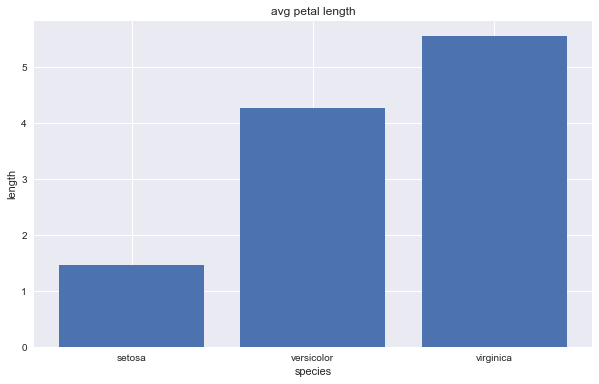

In [105]:
figure, ax = plt.subplots(figsize = (10,6))
ax.bar(x, y)
ax.set_title('avg petal length')
ax.set_xlabel("species")
ax.set_ylabel("length")

In [ ]:
# your turn - create a bar chart using the following dummy data
persons = ['Annie', 'David', 'Lucy','Jin']
height = [60, 65, 67, 62]

plt.bar(persons, height)

In [ ]:
# scatterplot 
figure, ax = plt.subplots()

ax.set_title('sepal length vs sepal width')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

x = df.sepal_length
y = df.sepal_width

ax.scatter(x, y)

In [41]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10
sepal_length,1.000000,-0.115303,0.870066,0.815701,1.000000
sepal_width,-0.115303,1.000000,-0.428329,-0.365487,-0.115303
petal_length,0.870066,-0.428329,1.000000,0.962424,0.870066
petal_width,0.815701,-0.365487,0.962424,1.000000,0.815701
sepal_length_10,1.000000,-0.115303,0.870066,0.815701,1.000000


Can you describe the relationship above?

#### 3. Statistics 

In [42]:
# calculate the mean and median value for sepal length 
df.sepal_length.describe()

count    149.000000
mean       5.851007
std        0.825491
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [44]:
df.sepal_length.agg(["mean", "median"])

mean      5.851007
median    5.800000
Name: sepal_length, dtype: float64

(2, 8)

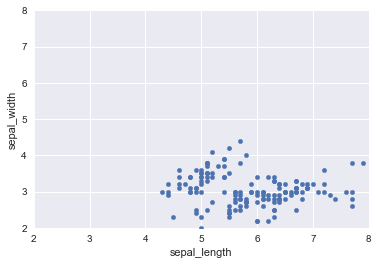

In [98]:
# what can you say about the distribution of sepal length and sepal width based on this distribution?
df.plot.scatter("sepal_length","sepal_width")
#equlize the axis for better visualization
plt.xlim(2,8)
plt.ylim(2,8)

#the graph looks like it shows weak correlation, but it's hard to tell whether the correlation is positive or negative
#my hunch is to say it's a very weak positive correlation

In [102]:
df[["sepal_length", "sepal_width"]].corr()
#however as shown below, the correlation is a weak NEGATIVE correlation

,sepal_length,sepal_width
sepal_length,1.000000,-0.115303
sepal_width,-0.115303,1.000000


(2, 4.5)

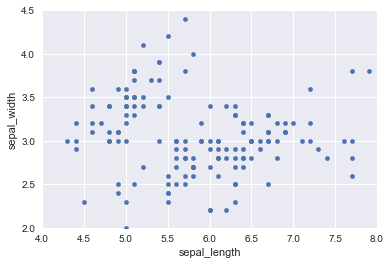

In [104]:
df.plot.scatter("sepal_length","sepal_width")
#squeezing the plot does not provide any insight full knowledge. It still seems like a positive correlation
#because there are almost 2 grouping of the scatter that shows high positive correlation
#however, the central tendency is unknown, so the correlation must be calculated to confirm
plt.xlim(4,8)
plt.ylim(2,4.5)

In [40]:
# which flower has the longest pedal? what is the species of that flower
df[["species", "petal_length"]].max()["species"]

'virginica'

#### 4. Python Data Structure 

In [45]:
groomer_info = { 'pets':
    [{'Ginger': [{
        'age': 5,
        'type': 'Pitbull',
        'attribute': ['Playful','Cheery','Hyper']
    }],
    'Chloe': [{
        'age': 1,
        'type': 'Maine Coon',
        'teams': ['Alert','Independent','Playful']
    }],
    'Chuck Norris': [{
        'age': 8,
        'type': 'Parrot',
        'teams': ['Talkative','Independent','Cheery']
    }],
    'Joe Rogan': [{
        'age': 2,
        'type': 'Labrador',
        'teams': ['Hyper','Playful','Energetic']
    }]}]
}    

In [55]:
# loop through the dictionary, create a list of names containing all pets' names
[name for name in groomer_info["pets"][0]] #0 calls the first keys


['Ginger', 'Chloe', 'Chuck Norris', 'Joe Rogan']

In [61]:
# loop through the collection, create a list that contain all pets' types
# desired output ['Pitbull','Maine Coon','Parrot','Labrador']
[groomer_info["pets"][0][name][0]["type"] for name in groomer_info["pets"][0]]

#go to groomer_info["pets"] -> list of dictionary
#get the dictionary from the list above [0] -> dictionary of all pets
#go to the name of the pet [name] -> list of dictionary of pet information
#go ot the dictionary from the list above [0] ->
#get the type from "type" in the in the dictionary above
#while searching for name from interable groomer_info["pets"][0]

['Pitbull', 'Maine Coon', 'Parrot', 'Labrador']

In [90]:
# create a function that returns the names of pets who is older than x years old

# the function should take in a dictionary containing all pet information, 
# and an integer indicating age you want to compare
def pets_older_than(pets, age):
    return [name for name in pets["pets"][0] if pets["pets"][0][name][0]["age"] > age]

In [92]:
pets_older_than(groomer_info, 1)

['Ginger', 'Chuck Norris', 'Joe Rogan']